
##Comandos para traer la base de datos.







In [ ]:
!pip install pyproj

     |████████████████████████████████| 6.5MB 5.4MB/s 


In [ ]:
!mkdir -p ./local/datasets/
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo" -O local/datasets/Dataset_JPV.zip && rm -rf /tmp/cookies.txt

--2021-04-21 19:47:01--  https://docs.google.com/uc?export=download&confirm=z7g8&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo
Resolving docs.google.com (docs.google.com)... 108.177.13.138, 108.177.13.100, 108.177.13.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.13.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-28-docs.googleusercontent.com/docs/securesc/t93t888bfunb3jm47iop8oek5cdf7tbd/bqeafh4r4kskdbsd5pav8p0uraf5vsgf/1619034375000/14059520846711589950/08924134462117284228Z/15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo?e=download [following]
--2021-04-21 19:47:01--  https://doc-0c-28-docs.googleusercontent.com/docs/securesc/t93t888bfunb3jm47iop8oek5cdf7tbd/bqeafh4r4kskdbsd5pav8p0uraf5vsgf/1619034375000/14059520846711589950/08924134462117284228Z/15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo?e=download
Resolving doc-0c-28-docs.googleusercontent.com (doc-0c-28-docs.googleusercontent.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connectin

## Descomprimimos el archivos de dataset

In [ ]:
!unzip -o "./local/datasets/Dataset_JPV.zip" -d Dataset_JPV > /dev/null

mapname:  conversion of  failed


#Importamos las libreria a utilizar 

In [ ]:
import numpy as np 
import cv2
import pyproj
from matplotlib import pyplot as plt
import json

In [ ]:
#load a image
I=cv2.imread('Dataset_JPV/train/x/img216.jpg',cv2.IMREAD_COLOR)#img72#216
img=cv2.imread('Dataset_JPV/train/y/img216.png',cv2.IMREAD_COLOR)
print(I.shape);type(img);img.shape

(240, 320, 3)


(240, 320, 3)

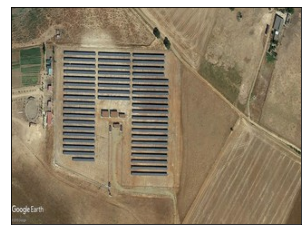

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [ ]:
Irgb = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(Irgb)
plt.xticks([]), plt.yticks([]), plt.show()

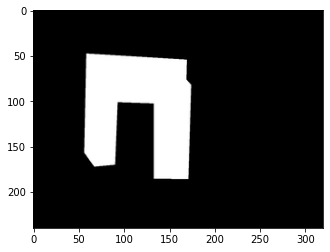

In [ ]:
plt.imshow(img)
#plt.xticks([]), plt.yticks([]), plt.show()

In [ ]:
img_tre=img[:,:,1]
print(img_tre[:,:].shape)

(240, 320)


In [ ]:
# Detecting shapes in image by selecting region  
# with same colors or intensity. 
contours,_=cv2.findContours(img_tre, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

In [ ]:
# Searching through every region selected to  
# find the required polygon. 
for cnt in contours : 
    area = cv2.contourArea(cnt) 
   
    # Shortlisting the regions based on there area. 
    if area > 400:  
        approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True) 
        cv2.drawContours(img, [approx], 0, (0, 0, 255), 7) 
        # Checking if the no. of sides of the selected region is 7. 

In [ ]:
approx.astype(np.float) 
approx.shape

(14, 1, 2)

In [ ]:
from google.colab.patches import cv2_imshow

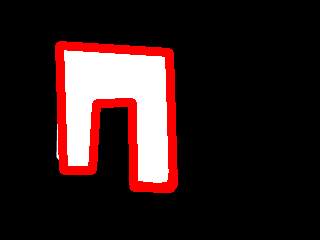

In [ ]:
cv2_imshow(img)  

In [ ]:
## Creamos el primer sistema de coordenadas en WGS84
## epsg:4326, http://spatialreference.org/ref/epsg/4326/
p1 = pyproj.Proj(init = "epsg:4326")
## Creamos el segundo sistema de coordenadas en ED50 UTM huso horario 30
## epsg:23030, http://spatialreference.org/ref/epsg/23030/
p2 = pyproj.Proj(init = "epsg:23030")
## Mi posición en WGS84
#lon = -122.45463
#lat = 38.161479#sonoma_raceway position
lon = 47.397742,
lat= 8.545594,
## Transformamos del sistema de coordenadas p1 (WGS84 en grográficas)
## al sistema de coordenadas p1 (ED50, UTM, Z30)
x2, y2 = pyproj.transform(p1, p2, lon, lat)
print (x2, y2)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axi

(6889496.91085045,) (1473033.5345514487,)


In [ ]:
x=np.zeros(shape=(14,2))


In [ ]:
def trans(ang):
  T=np.array([[np.cos(ang), -np.sin(ang)],
              [np.sin(ang), np.cos(ang)]])
  return T



In [ ]:
for i in range(x.shape[0]):
  x[i][0]=x[i][0]+x2
  x[i][1]=x[i][1]+y2



In [ ]:
approxrot=approx.dot(trans(np.deg2rad(45)))#multiplicamos matrix del poligono por la matrix de rotación
approxfloat=approxrot.reshape(14,2).astype(np.float)
approx_f=x+approxfloat


In [ ]:
print(approxfloat); print(x)

[[ 73.53910524  -9.89949494]
 [164.75588002  75.66042559]
 [185.26197667  55.15432893]
 [140.71424946   4.94974747]
 [165.4629868  -21.21320344]
 [224.85995642  36.76955262]
 [239.00209204  24.04163056]
 [226.27416998  38.18376618]
 [253.85133445  12.02081528]
 [239.00209204  25.45584412]
 [252.43712088  10.60660172]
 [243.95183951   0.70710678]
 [253.14422766   8.48528137]
 [156.27059864 -82.7314934 ]]
[[6889496.91085045 1473033.53455145]
 [6889496.91085045 1473033.53455145]
 [6889496.91085045 1473033.53455145]
 [6889496.91085045 1473033.53455145]
 [6889496.91085045 1473033.53455145]
 [6889496.91085045 1473033.53455145]
 [6889496.91085045 1473033.53455145]
 [6889496.91085045 1473033.53455145]
 [6889496.91085045 1473033.53455145]
 [6889496.91085045 1473033.53455145]
 [6889496.91085045 1473033.53455145]
 [6889496.91085045 1473033.53455145]
 [6889496.91085045 1473033.53455145]
 [6889496.91085045 1473033.53455145]]


In [ ]:
for i in range(x.shape[0]):
   approx_f[i][0],approx_f[i][1] =pyproj.transform(p2,p1, approx_f[i][0], approx_f[i][1])
print(approx_f)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  


[[47.39815565  8.54546067]
 [47.398771    8.54585681]
 [47.39886779  8.54571779]
 [47.39855848  8.545476  ]
 [47.39867382  8.54530009]
 [47.39907688  8.54557107]
 [47.39914511  8.54548331]
 [47.39908651  8.54557772]
 [47.39921816  8.54539887]
 [47.39914659  8.54549143]
 [47.39920853  8.54539222]
 [47.39914926  8.54534424]
 [47.39921039  8.54537931]
 [47.39855652  8.54495659]]


In [ ]:
#polylist=list(approx_f)   
#listatuplas=[]
#print(polylist)
#for i in polylist:    
#    t=tuple(i)
#    listatuplas.append(t)
#print(listatuplas)

In [ ]:
#!pip install geojson

In [ ]:
#from geojson import Polygon

In [ ]:
#Polygon(listatuplas)

#creando el archivo PLAN

In [ ]:
plan={
    "fileType": "Plan",
    "geoFence": {
        "circles": [
        ],
        "polygons": [
        ],
        "version": 2
    },
    "groundStation": "QGroundControl",
}


In [ ]:
del listaItems
del item

In [ ]:
rallyPoints={
        "points": [
        ],
        "version": 2
    }

mission=  {
        "cruiseSpeed": 15,
        "firmwareType": 12,
        "hoverSpeed": 5      
    }

plannedHomePosition = [
            47.397742,
            8.545594,
            488
        ]

item  = {
       "AMSLAltAboveTerrain": None,
        "Altitude": 5,
        "AltitudeMode": 0,
        "autoContinue": True,
        "command": 22,
        "doJumpId": 1,
        "frame": 3,
        "params": [
                    0,
                    0,
                    0,
                    None,
                    47.39773941040039,
                    8.5455904006958,
                    5
                ],
                "type": "SimpleItem"
                }

In [ ]:
altitud=5
listaItems=[]
item1=item.copy()
for i in range(approx_f.shape[0]):
  #for x,y in item.items():
  item1=item.copy()
  if item1['doJumpId']==1:
    item1['doJumpId']=i
    if i>0:
      item1['command']=16
    #print(i)
  if item1['params'][0]==0:
    item1['params']=[0,0,0,None,approx_f[i][0],approx_f[i][1],altitud]
  print(i)
  listaItems.append(item1)
  print(approx_f.shape[0])
  if i==approx_f.shape[0]-1:
    item2 = {
       "AMSLAltAboveTerrain": None,
        "Altitude": 0,
        "AltitudeMode": 0,
        "autoContinue": True,
        "command": 21,
        "doJumpId": i+1,
        "frame": 3,
        "params": [
                    0,
                    0,
                    0,
                    None,
                    47.39773941040039,
                    8.5455904006958,
                    0
                ],
                "type": "SimpleItem"
                }
    listaItems.append(item2)
print(listaItems)

0
14
1
14
2
14
3
14
4
14
5
14
6
14
7
14
8
14
9
14
10
14
11
14
12
14
13
14
[{'AMSLAltAboveTerrain': None, 'Altitude': 5, 'AltitudeMode': 0, 'autoContinue': True, 'command': 22, 'doJumpId': 0, 'frame': 3, 'params': [0, 0, 0, None, 47.39815565215649, 8.545460669235164, 5], 'type': 'SimpleItem'}, {'AMSLAltAboveTerrain': None, 'Altitude': 5, 'AltitudeMode': 0, 'autoContinue': True, 'command': 16, 'doJumpId': 1, 'frame': 3, 'params': [0, 0, 0, None, 47.398770999405116, 8.545856813858478, 5], 'type': 'SimpleItem'}, {'AMSLAltAboveTerrain': None, 'Altitude': 5, 'AltitudeMode': 0, 'autoContinue': True, 'command': 16, 'doJumpId': 2, 'frame': 3, 'params': [0, 0, 0, None, 47.39886779360772, 8.545717787664401, 5], 'type': 'SimpleItem'}, {'AMSLAltAboveTerrain': None, 'Altitude': 5, 'AltitudeMode': 0, 'autoContinue': True, 'command': 16, 'doJumpId': 3, 'frame': 3, 'params': [0, 0, 0, None, 47.398558476386356, 8.545476001050782, 5], 'type': 'SimpleItem'}, {'AMSLAltAboveTerrain': None, 'Altitude': 5, 'A

In [ ]:
mission['items']=listaItems
mission["plannedHomePosition"]=plannedHomePosition
mission["vehicleType"]=2
mission["version"]=2
plan['mission']=mission
plan['rallyPoints']=rallyPoints
plan['version']=1

with open('cover_missionR1.plan','w') as f:
    json.dump(plan,f)

In [ ]:
for x,y in item.items():
  print(x,y)

AMSLAltAboveTerrain None
Altitude 5
AltitudeMode 0
autoContinue True
command 22
doJumpId 1
frame 3
params [0, 0, 0, None, 47.39773941040039, 8.5455904006958, 5]
type SimpleItem


In [ ]:
item1['params'][0]

0

In [ ]:
print(listaItems)

[{'AMSLAltAboveTerrain': None, 'Altitude': 5, 'AltitudeMode': 0, 'autoContinue': True, 'command': 22, 'doJumpId': 0, 'frame': 3, 'params': [0, 0, 0, None, 47.39815565215649, 8.545460669235164, 5], 'type': 'SimpleItem'}, {'AMSLAltAboveTerrain': None, 'Altitude': 5, 'AltitudeMode': 0, 'autoContinue': True, 'command': 16, 'doJumpId': 1, 'frame': 3, 'params': [0, 0, 0, None, 47.398770999405116, 8.545856813858478, 5], 'type': 'SimpleItem'}, {'AMSLAltAboveTerrain': None, 'Altitude': 5, 'AltitudeMode': 0, 'autoContinue': True, 'command': 16, 'doJumpId': 2, 'frame': 3, 'params': [0, 0, 0, None, 47.39886779360772, 8.545717787664401, 5], 'type': 'SimpleItem'}, {'AMSLAltAboveTerrain': None, 'Altitude': 5, 'AltitudeMode': 0, 'autoContinue': True, 'command': 16, 'doJumpId': 3, 'frame': 3, 'params': [0, 0, 0, None, 47.398558476386356, 8.545476001050782, 5], 'type': 'SimpleItem'}, {'AMSLAltAboveTerrain': None, 'Altitude': 5, 'AltitudeMode': 0, 'autoContinue': True, 'command': 16, 'doJumpId': 4, 'fram

In [ ]:
for i in item:
  print(item[i])

None
5
0
True
22
1
3
[0, 0, 0, None, 47.39773941040039, 8.5455904006958, 5]
SimpleItem
